# Классификация текстов с использованием Наивного Байесовского Классификатора

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import model_selection

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [459]:
# откройте данные: ваш код здесь
data = pd.read_csv('data/spam_or_not_spam.zip')
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


P.S. Похоже, что сообщения отсортированы по типу. То есть, спам-сообщения в конце.

In [460]:
# рассчитайте частоты для классов : ваш код здесь
data['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

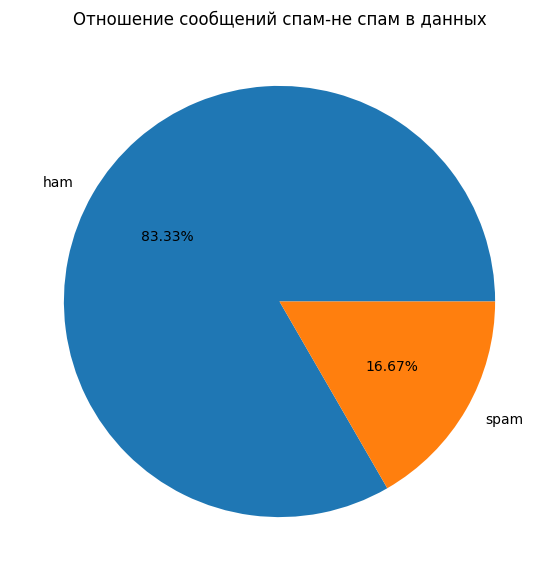

In [461]:
# визуализируйте результат: ваш код здесь
fig = plt.figure(figsize=(7,7))
plt.pie(data['label'].value_counts()/data.shape[0] * 100, labels=['ham', 'spam'], autopct='%.2f%%')
plt.title('Отношение сообщений спам-не спам в данных')
plt.show()

Категории не равнозначные. Спам-сообщений сильно меньше.

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [462]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [463]:
#Для начала гляну, есть ли стандартные пропуски
data.isna().value_counts()

email  label
False  False    2999
True   False       1
Name: count, dtype: int64

In [464]:
#ваш код здесь
empty_rows = data['email'].isna() | data['email'].astype('str').str.strip().eq('') 
display(empty_rows.value_counts())
data['email'] = data['email'].apply(lambda x: np.nan if str(x).strip() == '' else x)
data = data.dropna(axis=0, how='any')
data.shape

email
False    2997
True        3
Name: count, dtype: int64

(2997, 2)

Итого: 1 пропуск был изначально, и ещё 2 сообщения состояли из пробелов, всего 3 пустых сообщения.

Переводим данные в векторный вид:

In [465]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [466]:
#ваш код здесь
print('Признаков после векторизации:', X.shape[1])

Признаков после векторизации: 34116


Признаков теперь более чем в 10 раз больше, чем самих сообщений. 

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [467]:
#ваш код здесь
y = data['label']

# X используем преобразованный CountVectorizer'ом

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [468]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [469]:
#ваш код здесь
round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [470]:
#ваш код здесь
NBmodel = ComplementNB(alpha=0.01)
NBmodel.fit(X_train, y_train)

y_train_pred = NBmodel.predict(X_train)
y_test_pred = NBmodel.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [471]:
#ваш код здесь
print('Accuracy train:', round(metrics.accuracy_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Accuracy test:', round(metrics.accuracy_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Recall train:', round(metrics.recall_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Recall test:', round(metrics.recall_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Precision train:', round(metrics.precision_score(y_pred=y_train_pred, y_true=y_train), 5))
print('Precision test:', round(metrics.precision_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('f1 train:', round(metrics.f1_score(y_pred=y_train_pred, y_true=y_train), 4))
print('f1 test:', round(metrics.f1_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

Accuracy train: 0.9996
Accuracy test: 0.988
--------------------
Recall train: 0.9973
Recall test: 0.9274
--------------------
Precision train: 1.0
Precision test: 1.0
--------------------
f1 train: 0.9987
f1 test: 0.9623
--------------------


Нарисуйте ROC-кривую:

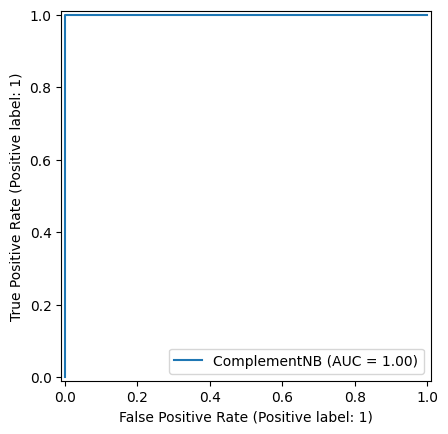

In [472]:
#ваш код здесь
#Для тренировочных данных
metrics.RocCurveDisplay.from_estimator(NBmodel, X_train, y_train)

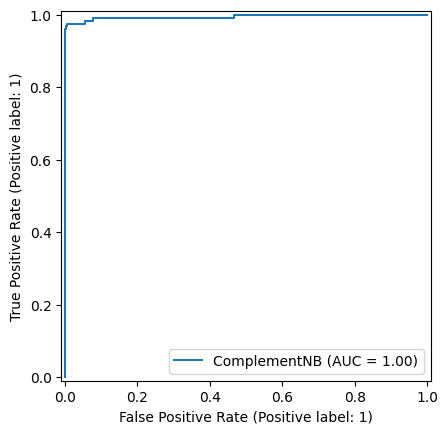

In [473]:
#Для тестовых данных
metrics.RocCurveDisplay.from_estimator(NBmodel, X_test, y_test)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [474]:
#ваш код здесь

param_grid_lr = [
              {'alpha': np.arange(0.01, 1, 0.01)}
]

# Параметры модели
grid_search_model = model_selection.GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid_lr, 
    cv=5, 
    n_jobs = -1
)  

# Инициализация поиска
%time grid_search_model.fit(X_train, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_model.score(X_train, y_train)))
y_train_pred = grid_search_model.predict(X_train)
y_test_pred = grid_search_model.predict(X_test)

print("Наилучшие значения гиперпараметров: {}".format(grid_search_model.best_params_))

print('Accuracy train:', round(metrics.accuracy_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Accuracy test:', round(metrics.accuracy_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Recall train:', round(metrics.recall_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Recall test:', round(metrics.recall_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Precision train:', round(metrics.precision_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Precision test:', round(metrics.precision_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('f1 train:', round(metrics.f1_score(y_pred=y_train_pred, y_true=y_train), 4))
print('f1 test:', round(metrics.f1_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

CPU times: total: 234 ms
Wall time: 1.82 s
accuracy на тестовом наборе: 1.00
Наилучшие значения гиперпараметров: {'alpha': 0.34}
Accuracy train: 0.9987
Accuracy test: 0.9947
--------------------
Recall train: 0.9946
Recall test: 0.9758
--------------------
Precision train: 0.9973
Precision test: 0.9918
--------------------
f1 train: 0.996
f1 test: 0.9837
--------------------


Да, alpha влияет на качество классификации. Все метрики, кроме precision, стали чуть лучше при предсказании тестовых данных.

# ДОПОЛНИТЕЛЬНО (для себя)

Смотрю разницу методов MultinomialNB и ComplementNB

In [475]:
NBmodel = MultinomialNB(alpha=0.01)
NBmodel.fit(X_train, y_train)

y_train_pred = NBmodel.predict(X_train)
y_test_pred = NBmodel.predict(X_test)

print('Accuracy train:', round(metrics.accuracy_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Accuracy test:', round(metrics.accuracy_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Recall train:', round(metrics.recall_score(y_pred=y_train_pred, y_true=y_train), 4))
print('Recall test:', round(metrics.recall_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('Precision train:', round(metrics.precision_score(y_pred=y_train_pred, y_true=y_train), 5))
print('Precision test:', round(metrics.precision_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

print('f1 train:', round(metrics.f1_score(y_pred=y_train_pred, y_true=y_train), 4))
print('f1 test:', round(metrics.f1_score(y_pred=y_test_pred, y_true=y_test), 4))
print('-'*20)

Accuracy train: 0.9991
Accuracy test: 0.9867
--------------------
Recall train: 0.9946
Recall test: 0.9194
--------------------
Precision train: 1.0
Precision test: 1.0
--------------------
f1 train: 0.9973
f1 test: 0.958
--------------------
